# House Prices : Advanced Regression Techniques(Part 1)
- Predict sales prices

In [130]:
%autosave 3000

Autosaving every 3000 seconds


## Data Dictonary

### variable

In [131]:
text = open('data_description.txt', mode = 'r').read()
print(text)

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

## Data Exploration

In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 80)

%autosave 3000
%matplotlib inline

Autosaving every 3000 seconds


In [133]:
train = pd.read_csv('train.csv')
train.head() 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [134]:
test = pd.read_csv('test.csv')
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [135]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [136]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-

In [137]:
ds = train.isnull().sum() 
ds[ds>0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [138]:
ds.index

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

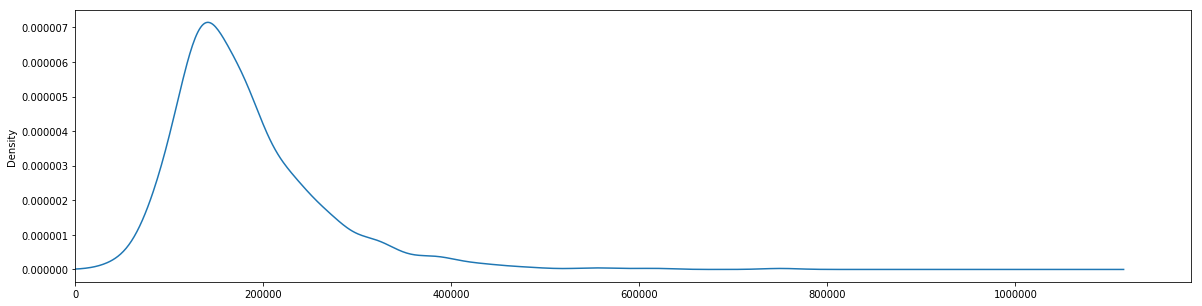

In [139]:
train['SalePrice'].plot(figsize = (20, 5), kind = 'kde', xlim = 0)

In [140]:
def chart_bar(feature):
    ax = train[[feature, 'SalePrice']].groupby(feature).mean().plot(kind = 'bar', figsize = (20,5), title = feature)
    ax.title.set_size(20)
    ax.set_xlabel(feature, fontsize = 20)
    ax.set_ylabel('Price', fontsize = 20)

for i in range(len(train.columns) - 2):
    chart_bar(train.columns[i + 1])

## Feature Engineering

In [141]:
train_raw, test_raw = train.copy(), test.copy()
train_test_data = [train, test]

In [142]:
train_test_data[1].head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


### 0. Functions

In [143]:
def train_test_info(feature, **options):
    print('Information of {}'.format(feature), '\n')
    for data, a in zip(train_test_data, ['Train', 'Test']):
        print(a)
        print('Number of null : ', data[feature].isnull().sum())
        print('Number of value unique : ', len(data[feature].unique()))
        if options.get('sort') == True:
            print('Kind of value unique : ', np.sort(data[feature].unique()))
        elif options.get('cut') == True:
            print('Kind of value unique : ----')
        else:
            print('Kind of value unique : ', data[feature].unique())
        print('\n')

In [144]:
def mapping(feature):
    uni1 = set(train_raw[feature].unique())
    uni2 = set(test_raw[feature].unique())
    feature_mapping = {}
    uni = uni1.union(uni2)
    for index, i in zip(uni, range(len(uni))):
        feature_mapping.update({index : i})
    return feature_mapping

### 1. MSSubClass
Identifies the type of dwelling involved in the sale.

    20	1-STORY 1946 & NEWER ALL STYLES
    30	1-STORY 1945 & OLDER
    40	1-STORY W/FINISHED ATTIC ALL AGES
    45	1-1/2 STORY - UNFINISHED ALL AGES
    50	1-1/2 STORY FINISHED ALL AGES
    60	2-STORY 1946 & NEWER
    70	2-STORY 1945 & OLDER
    75	2-1/2 STORY ALL AGES
    80	SPLIT OR MULTI-LEVEL
    85	SPLIT FOYER
    90	DUPLEX - ALL STYLES AND AGES
    120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
    150	1-1/2 STORY PUD - ALL AGES
    160	2-STORY PUD - 1946 & NEWER
    190	2 FAMILY CONVERSION - ALL STYLES AND AGES

In [145]:
test['MSSubClass'].unique()

array([ 20,  60, 120, 160,  80,  30,  50,  90,  85, 190,  45,  70,  75,
       180,  40, 150], dtype=int64)

In [146]:
train_test_info('MSSubClass')

Information of MSSubClass 

Train
Number of null :  0
Number of value unique :  15
Kind of value unique :  [ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]


Test
Number of null :  0
Number of value unique :  16
Kind of value unique :  [ 20  60 120 160  80  30  50  90  85 190  45  70  75 180  40 150]




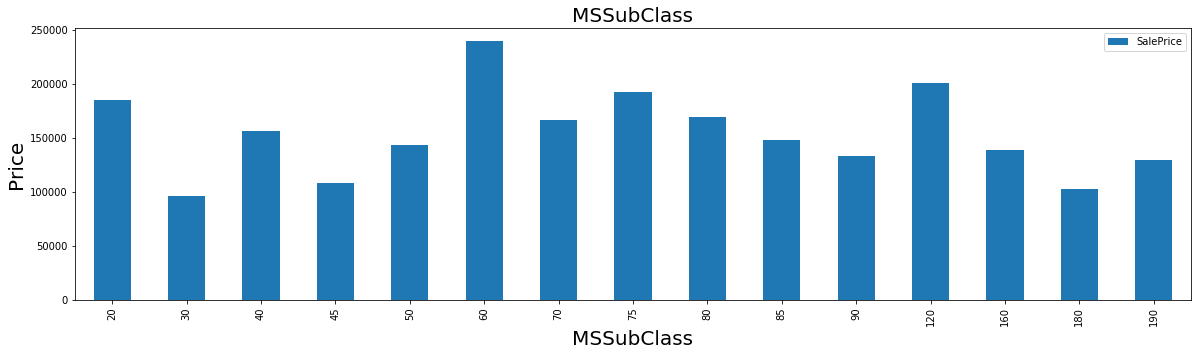

In [147]:
chart_bar('MSSubClass')

In [148]:
mapping('MSSubClass')

{20: 3,
 30: 7,
 40: 9,
 45: 10,
 50: 11,
 60: 14,
 70: 0,
 75: 1,
 80: 2,
 85: 4,
 90: 6,
 120: 13,
 150: 5,
 160: 8,
 180: 12,
 190: 15}

In [149]:
for data in train_test_data:
    data['MSSubClass'] = data['MSSubClass'].map(mapping('MSSubClass'))

In [150]:
train_test_info('MSSubClass')

Information of MSSubClass 

Train
Number of null :  0
Number of value unique :  15
Kind of value unique :  [14  3  0 11 15 10  6 13  7  4  2  8  1 12  9]


Test
Number of null :  0
Number of value unique :  16
Kind of value unique :  [ 3 14 13  8  2  7 11  6  4 15 10  0  1 12  9  5]




### 2. MSZoning
Identifies the general zoning classification of the sale.
		
    A	 Agriculture
    C	 Commercial
    FV    Floating Village Residential
    I	 Industrial
    RH	Residential High Density
    RL	Residential Low Density
    RP	Residential Low Density Park 
    RM	Residential Medium Density

In [151]:
train_test_info('MSZoning')

Information of MSZoning 

Train
Number of null :  0
Number of value unique :  5
Kind of value unique :  ['RL' 'RM' 'C (all)' 'FV' 'RH']


Test
Number of null :  4
Number of value unique :  6
Kind of value unique :  ['RH' 'RL' 'RM' 'FV' 'C (all)' nan]




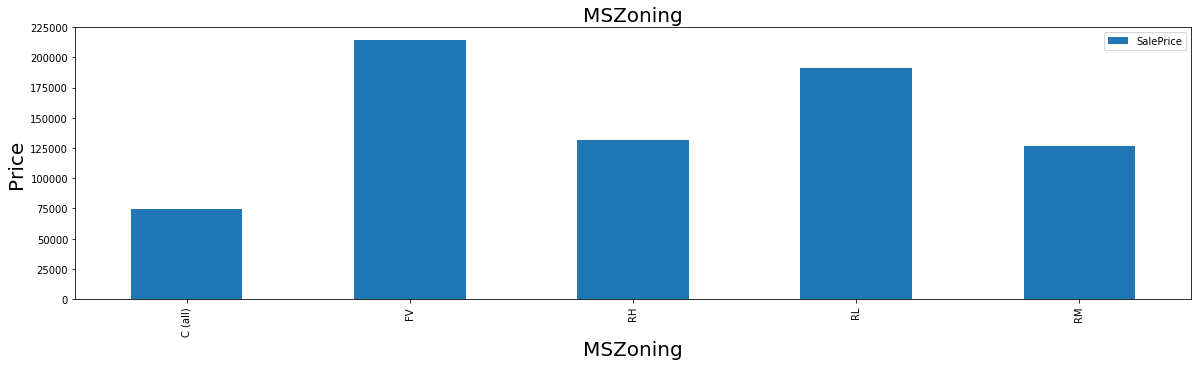

In [152]:
chart_bar('MSZoning')

### 2-1. Fill Null data

In [153]:
test[test['MSZoning'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
455,1916,7,NaN,109.0,21780,Grvl,NaN,Reg,Lvl,NaN,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,2,4,1910,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Fa,Fa,CBlock,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,N,FuseA,810,0,0,810,0.0,0.0,1,0,1,1,TA,4,Min1,0,NaN,Detchd,1975.0,Unf,1.0,280.0,TA,TA,N,119,24,0,0,0,0,NaN,NaN,NaN,0,3,2009,ConLD,Normal
756,2217,3,NaN,80.0,14584,Pave,NaN,Reg,Low,AllPub,Inside,Mod,IDOTRR,Norm,Norm,1Fam,1Story,1,5,1952,1952,Gable,CompShg,AsbShng,VinylSd,None,0.0,Fa,Po,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,Wall,Po,N,FuseA,733,0,0,733,0.0,0.0,1,0,2,1,Fa,4,NaN,0,NaN,Attchd,1952.0,Unf,2.0,487.0,Fa,Po,N,0,0,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Abnorml
790,2251,0,NaN,NaN,56600,Pave,NaN,IR1,Low,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,2.5Unf,5,1,1900,1950,Hip,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,686.0,686.0,GasA,Ex,Y,SBrkr,1150,686,0,1836,0.0,0.0,2,0,4,1,TA,7,Maj1,0,NaN,Detchd,1900.0,Unf,1.0,288.0,TA,Fa,N,0,0,0,0,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal
1444,2905,3,NaN,125.0,31250,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Artery,Norm,1Fam,1Story,1,3,1951,1951,Gable,CompShg,CBlock,VinylSd,None,0.0,TA,Fa,CBlock,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,Y,FuseA,1600,0,0,1600,0.0,0.0,1,1,3,1,TA,6,Mod,0,NaN,Attchd,1951.0,Unf,1.0,270.0,Fa,TA,N,0,0,135,0,0,0,NaN,NaN,NaN,0,5,2006,WD,Normal


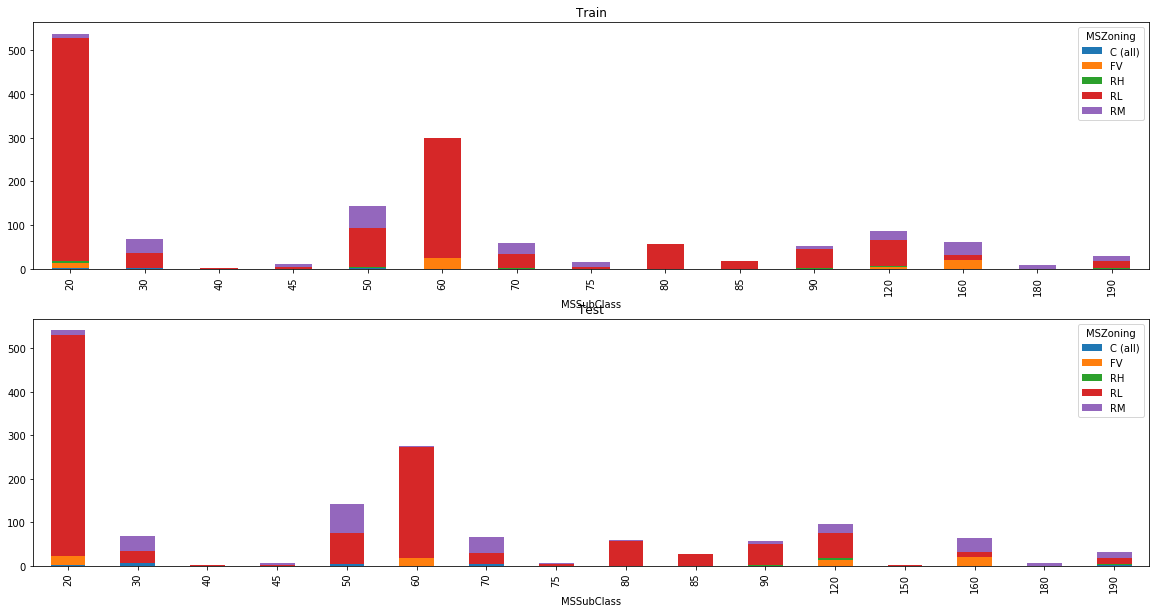

In [154]:
train_fill = pd.read_csv('train.csv')
test_fill = pd.read_csv('test.csv')
fig, axes = plt.subplots(2,1)
train_fill[['MSSubClass', 'MSZoning']].groupby(['MSSubClass', 'MSZoning']).size().unstack().plot(kind  = 'bar', figsize = (20, 10), stacked = True, ax = axes[0], title = 'Train')
test_fill[['MSSubClass', 'MSZoning']].groupby(['MSSubClass', 'MSZoning']).size().unstack().plot(kind  = 'bar', figsize = (20, 10), stacked = True, ax = axes[1], title = 'Test')

In [155]:
test['MSZoning'] = test['MSZoning'].fillna('RL')
test['MSZoning'].isnull().sum()

0

### 2-2. Mapping

In [156]:
mszoning_mapping = mapping('MSZoning')
for data in train_test_data:
    data['MSZoning'].replace(mszoning_mapping, inplace = True)

In [157]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,14,4,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,3,4,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,14,4,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,0,4,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,14,4,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [158]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,3,5,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,3,4,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,14,4,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,14,4,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,13,4,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


### 3. LotFrontage
Linear feet of street connected to property

In [159]:
train_test_info('LotFrontage')

Information of LotFrontage 

Train
Number of null :  259
Number of value unique :  111
Kind of value unique :  [ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.
  93.  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.
  36.  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39.
 144. 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.]


Test
Number of null :  227
Number of value unique :  116
Kind of value unique :  [ 80.  81.  74.  78.  43.  75.  nan  63.  85.  70.  26.  21.  24. 102.
  94.  90.  79. 110. 105.  41. 100.  67.  60.  73.  92.  84.  39.  88.
  25.  30.  57.  68.  98. 120.  87. 119.  65.  56.  69.  50.  53.  52.
  51.  72.  86. 124.  44.  83

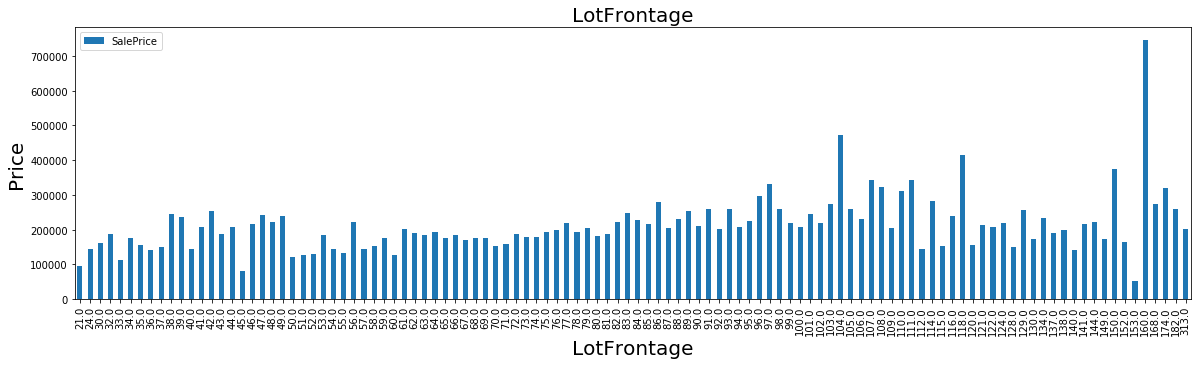

In [160]:
chart_bar('LotFrontage')

### 3-1. Fill Nan

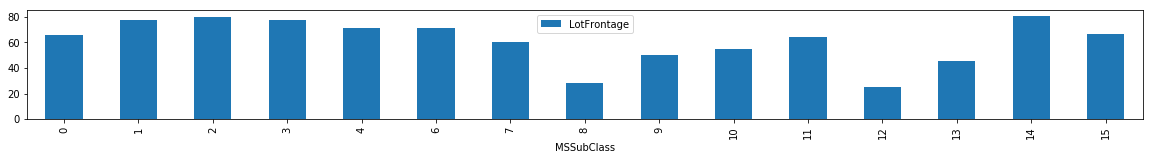

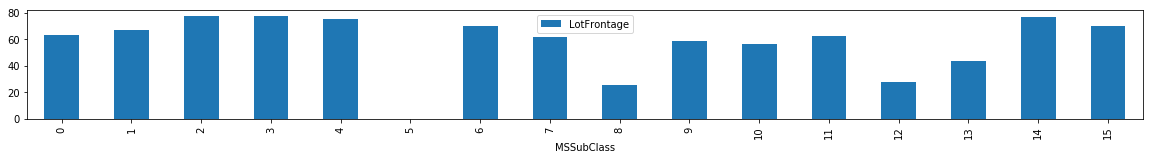

In [161]:
train[['MSSubClass', 'LotFrontage']].groupby('MSSubClass').mean().plot(kind = 'bar', figsize = (20, 2))
test[['MSSubClass', 'LotFrontage']].groupby('MSSubClass').mean().plot(kind = 'bar', figsize = (20, 2))

In [162]:
for data in train_test_data:
    df = data[['MSSubClass', 'LotFrontage']].groupby('MSSubClass')['LotFrontage'].mean()
    for index, value in zip(df.index, df.values):
        data.loc[data['MSSubClass'] == index, 'LotFrontage'] = data.loc[data['MSSubClass'] == index, 'LotFrontage'].fillna(value)

In [163]:
print(train['LotFrontage'].isnull().sum())
print(test['LotFrontage'].isnull().sum())

0
1


In [164]:
test.loc[test['LotFrontage'].isnull(), 'LotFrontage'] = test['LotFrontage'].mean()

In [165]:
print(train['LotFrontage'].isnull().sum())
print(test['LotFrontage'].isnull().sum())

0
0


## 4. LotArea
Lot size in square feet

In [166]:
train_test_info('LotArea')

Information of LotArea 

Train
Number of null :  0
Number of value unique :  1073
Kind of value unique :  [ 8450  9600 11250 ... 17217 13175  9717]


Test
Number of null :  0
Number of value unique :  1106
Kind of value unique :  [11622 14267 13830 ...  1894 20000 10441]




In [167]:
train['LotArea'].describe()

count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64

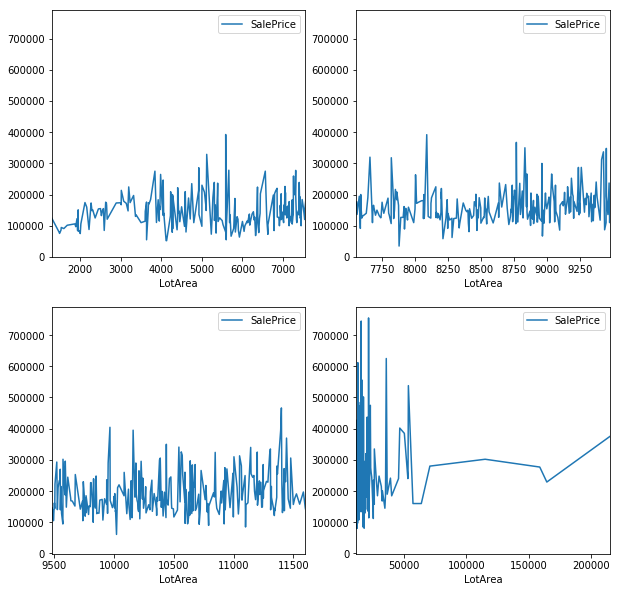

In [168]:
fig, axes = plt.subplots(2,2, figsize = (10,10))
train[['LotArea', 'SalePrice']].groupby('LotArea').mean().plot(xlim = (1300, 7553.5), ax = axes[0,0])
train[['LotArea', 'SalePrice']].groupby('LotArea').mean().plot(xlim = (7553.5, 9478.5), ax = axes[0,1])
train[['LotArea', 'SalePrice']].groupby('LotArea').mean().plot(xlim = (9478.5, 11601.5), ax = axes[1,0])
train[['LotArea', 'SalePrice']].groupby('LotArea').mean().plot(xlim = (11601.5, 215245), ax = axes[1,1])

In [169]:
train_lot = pd.read_csv('train.csv')

In [170]:
train_lot.loc[train_lot['LotArea'] < 7553.5, 'LotArea'] = 0
train_lot.loc[(train_lot['LotArea'] >= 7553.5) & (train_lot['LotArea'] < 9478.5), 'LotArea'] = 1
train_lot.loc[(train_lot['LotArea'] >= 9478.5) & (train_lot['LotArea'] < 11601.5), 'LotArea'] = 2
train_lot.loc[(train_lot['LotArea'] >= 11601.5), 'LotArea'] = 3

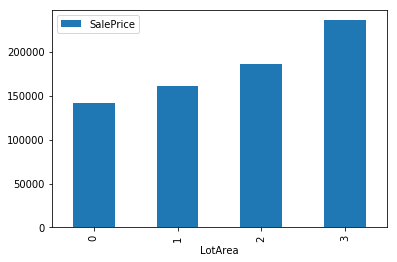

In [171]:
train_lot[['LotArea', 'SalePrice']].groupby('LotArea').mean().plot(kind = 'bar')

## 5. Street
Type of road access to property

In [172]:
train_test_info('Street')

Information of Street 

Train
Number of null :  0
Number of value unique :  2
Kind of value unique :  ['Pave' 'Grvl']


Test
Number of null :  0
Number of value unique :  2
Kind of value unique :  ['Pave' 'Grvl']




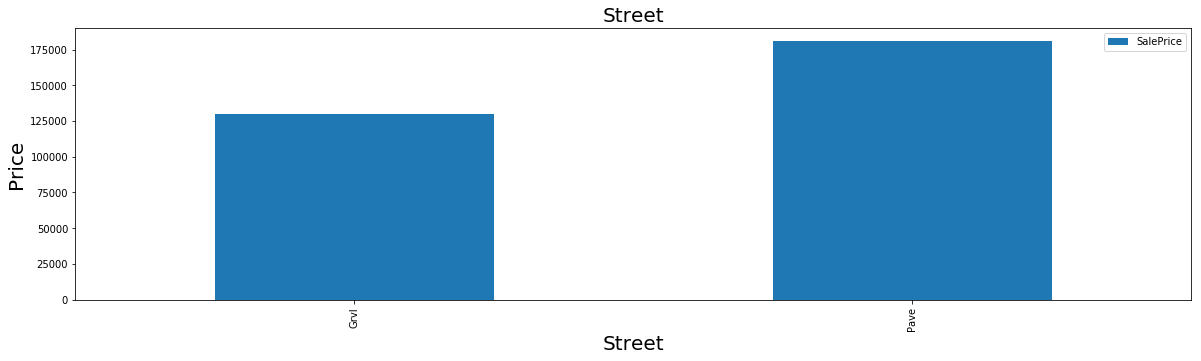

In [173]:
chart_bar('Street')

In [174]:
for data in train_test_data:
    data.loc[data['Street'] == 'Grvl', 'Street'] = 0
    data.loc[data['Street'] == 'Pave', 'Street'] = 1

## 6. Alley
Type of alley access to property

In [175]:
train_test_info('Alley')

Information of Alley 

Train
Number of null :  1369
Number of value unique :  3
Kind of value unique :  [nan 'Grvl' 'Pave']


Test
Number of null :  1352
Number of value unique :  3
Kind of value unique :  [nan 'Pave' 'Grvl']




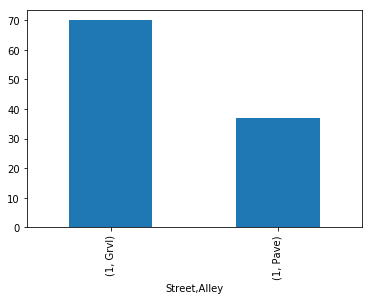

In [176]:
test[['Street', 'Alley']].groupby(['Street', 'Alley']).size().plot(kind = 'bar')

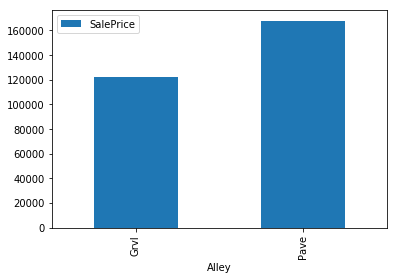

In [177]:
train[['Alley', 'SalePrice']].groupby('Alley').mean().plot(kind = 'bar')

In [178]:
for data in train_test_data:
    data.loc[data['Alley'] == 'Grvl', 'Alley'] = 0
    data.loc[data['Alley'] == 'Pave', 'Alley'] = 1
    data['Alley'] = data['Alley'].fillna(3)

In [179]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,3,5,80.0,11622,1,3,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,3,4,81.0,14267,1,3,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,14,4,74.0,13830,1,3,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,14,4,78.0,9978,1,3,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,13,4,43.0,5005,1,3,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


### 7. LotShape
General shape of property

    Reg	Regular	
    IR1	Slightly irregular
    IR2	Moderately Irregular
    IR3	Irregular 

In [180]:
train_test_info('LotShape')

Information of LotShape 

Train
Number of null :  0
Number of value unique :  4
Kind of value unique :  ['Reg' 'IR1' 'IR2' 'IR3']


Test
Number of null :  0
Number of value unique :  4
Kind of value unique :  ['Reg' 'IR1' 'IR2' 'IR3']




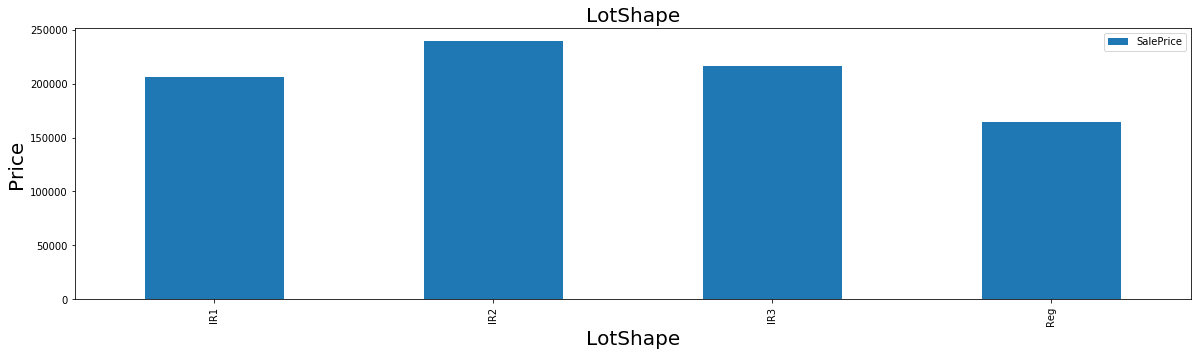

In [181]:
chart_bar('LotShape')

In [182]:
for data in train_test_data:
    data['LotShape'] = data['LotShape'].map(mapping('LotShape'))

In [183]:
train_test_info('LotShape')

Information of LotShape 

Train
Number of null :  0
Number of value unique :  4
Kind of value unique :  [1 3 2 0]


Test
Number of null :  0
Number of value unique :  4
Kind of value unique :  [1 3 2 0]




### 8. LandContour
Flatness of the property

    Lvl	Near Flat/Level	
    Bnk	Banked - Quick and significant rise from street grade to building
    HLS	Hillside - Significant slope from side to side
    Low	Depression

In [184]:
train_test_info('LandContour')

Information of LandContour 

Train
Number of null :  0
Number of value unique :  4
Kind of value unique :  ['Lvl' 'Bnk' 'Low' 'HLS']


Test
Number of null :  0
Number of value unique :  4
Kind of value unique :  ['Lvl' 'HLS' 'Bnk' 'Low']




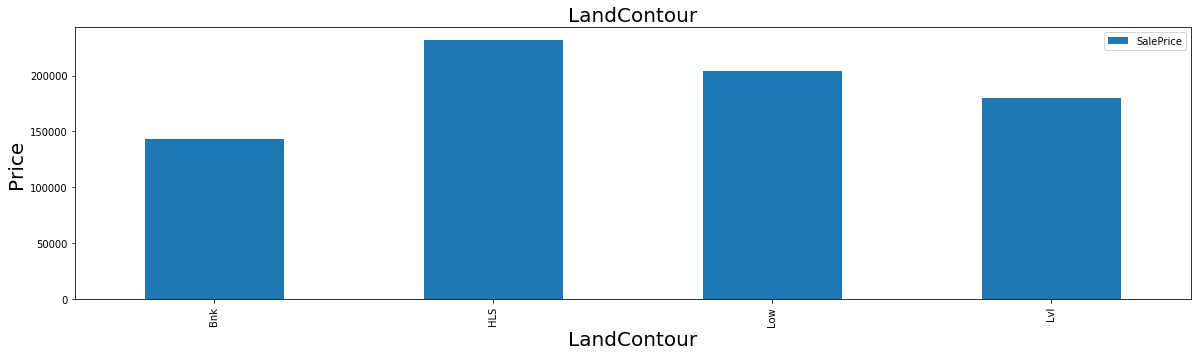

In [185]:
chart_bar('LandContour')

In [186]:
for data in train_test_data:
    data['LandContour'] = data['LandContour'].map(mapping('LandContour'))

### 9. Utilities
Type of utilities available

    AllPub	All public Utilities (E,G,W,& S)	
    NoSewr	Electricity, Gas, and Water (Septic Tank)
    NoSeWa	Electricity and Gas Only
    ELO	Electricity only	
	

	
LandSlope: Slope of property
		
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope 

In [187]:
train_test_info('Utilities')

Information of Utilities 

Train
Number of null :  0
Number of value unique :  2
Kind of value unique :  ['AllPub' 'NoSeWa']


Test
Number of null :  2
Number of value unique :  2
Kind of value unique :  ['AllPub' nan]




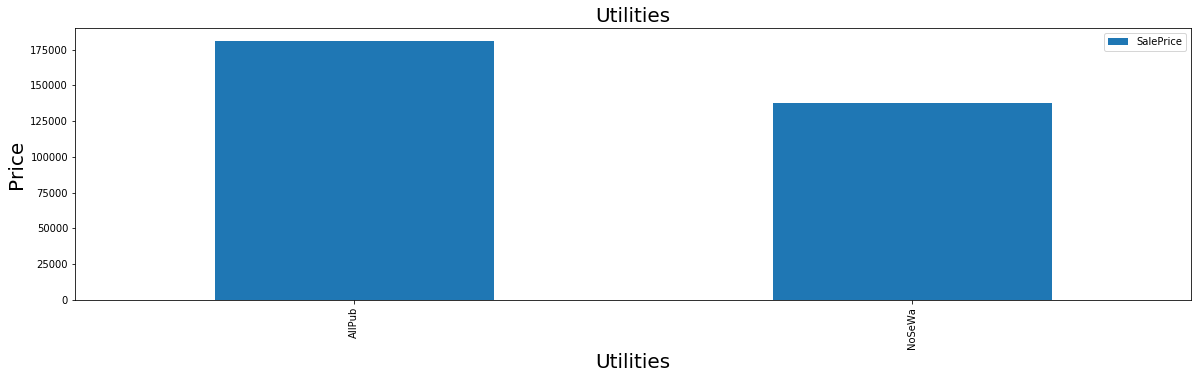

In [188]:
chart_bar('Utilities')

In [189]:
for data in train_test_data:
    print('Size of values', data['Utilities'].value_counts())
    print('\n')

Size of values AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64


Size of values AllPub    1457
Name: Utilities, dtype: int64




In [190]:
for data in train_test_data:
    data.drop('Utilities', axis = 1, inplace = True)

### 10. LotConfig
Lot configuration

       Inside	Inside lot
       Corner	Corner lot
       CulDSac	Cul-de-sac
       FR2	Frontage on 2 sides of property
       FR3	Frontage on 3 sides of property

In [191]:
train_test_info('LotConfig')

Information of LotConfig 

Train
Number of null :  0
Number of value unique :  5
Kind of value unique :  ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']


Test
Number of null :  0
Number of value unique :  5
Kind of value unique :  ['Inside' 'Corner' 'FR2' 'CulDSac' 'FR3']




In [192]:
for data in train_test_data:
    data['LotConfig'] = data['LotConfig'].map(mapping('LotConfig'))

In [193]:
train_test_info('LotConfig')

Information of LotConfig 

Train
Number of null :  0
Number of value unique :  5
Kind of value unique :  [4 3 1 2 0]


Test
Number of null :  0
Number of value unique :  5
Kind of value unique :  [4 1 3 2 0]




### 11. LandSlope
Slope of property
		
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope

In [194]:
train_test_info('LandSlope')

Information of LandSlope 

Train
Number of null :  0
Number of value unique :  3
Kind of value unique :  ['Gtl' 'Mod' 'Sev']


Test
Number of null :  0
Number of value unique :  3
Kind of value unique :  ['Gtl' 'Mod' 'Sev']




In [195]:
for data in train_test_data:
    data['LandSlope'] = data['LandSlope'].map(mapping('LandSlope'))

train_test_info('LandSlope')

Information of LandSlope 

Train
Number of null :  0
Number of value unique :  3
Kind of value unique :  [1 2 0]


Test
Number of null :  0
Number of value unique :  3
Kind of value unique :  [1 2 0]




### 12. Neighborhood
Physical locations within Ames city limits

       Blmngtn	Bloomington Heights
       Blueste	Bluestem
       BrDale	Briardale
       BrkSide	Brookside
       ClearCr	Clear Creek
       CollgCr	College Creek
       Crawfor	Crawford
       Edwards	Edwards
       Gilbert	Gilbert
       IDOTRR	Iowa DOT and Rail Road
       MeadowV	Meadow Village
       Mitchel	Mitchell
       Names	North Ames
       NoRidge	Northridge
       NPkVill	Northpark Villa
       NridgHt	Northridge Heights
       NWAmes	Northwest Ames
       OldTown	Old Town
       SWISU	South & West of Iowa State University
       Sawyer	Sawyer
       SawyerW	Sawyer West
       Somerst	Somerset
       StoneBr	Stone Brook
       Timber	Timberland
       Veenker	Veenker

In [196]:
train_test_info('Neighborhood', sort = True)

Information of Neighborhood 

Train
Number of null :  0
Number of value unique :  25
Kind of value unique :  ['Blmngtn' 'Blueste' 'BrDale' 'BrkSide' 'ClearCr' 'CollgCr' 'Crawfor'
 'Edwards' 'Gilbert' 'IDOTRR' 'MeadowV' 'Mitchel' 'NAmes' 'NPkVill'
 'NWAmes' 'NoRidge' 'NridgHt' 'OldTown' 'SWISU' 'Sawyer' 'SawyerW'
 'Somerst' 'StoneBr' 'Timber' 'Veenker']


Test
Number of null :  0
Number of value unique :  25
Kind of value unique :  ['Blmngtn' 'Blueste' 'BrDale' 'BrkSide' 'ClearCr' 'CollgCr' 'Crawfor'
 'Edwards' 'Gilbert' 'IDOTRR' 'MeadowV' 'Mitchel' 'NAmes' 'NPkVill'
 'NWAmes' 'NoRidge' 'NridgHt' 'OldTown' 'SWISU' 'Sawyer' 'SawyerW'
 'Somerst' 'StoneBr' 'Timber' 'Veenker']




In [197]:
for data in train_test_data:
    data['Neighborhood'] = data['Neighborhood'].map(mapping('Neighborhood'))
train_test_info('Neighborhood', sort = True)

Information of Neighborhood 

Train
Number of null :  0
Number of value unique :  25
Kind of value unique :  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24]


Test
Number of null :  0
Number of value unique :  25
Kind of value unique :  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24]




### 13. Condition1
Proximity to various conditions
	
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad

In [198]:
train_test_info('Condition1', sort = True)

Information of Condition1 

Train
Number of null :  0
Number of value unique :  9
Kind of value unique :  ['Artery' 'Feedr' 'Norm' 'PosA' 'PosN' 'RRAe' 'RRAn' 'RRNe' 'RRNn']


Test
Number of null :  0
Number of value unique :  9
Kind of value unique :  ['Artery' 'Feedr' 'Norm' 'PosA' 'PosN' 'RRAe' 'RRAn' 'RRNe' 'RRNn']




In [199]:
for data in train_test_data:
    data['Condition1'] = data['Condition1'].map(mapping('Condition1'))
train_test_info('Condition1', sort = True)

Information of Condition1 

Train
Number of null :  0
Number of value unique :  9
Kind of value unique :  [0 1 2 3 4 5 6 7 8]


Test
Number of null :  0
Number of value unique :  9
Kind of value unique :  [0 1 2 3 4 5 6 7 8]




### 14. Condition2
Proximity to various conditions (if more than one is present)
		
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad
	

In [200]:
train_test_info('Condition2', sort = True)

Information of Condition2 

Train
Number of null :  0
Number of value unique :  8
Kind of value unique :  ['Artery' 'Feedr' 'Norm' 'PosA' 'PosN' 'RRAe' 'RRAn' 'RRNn']


Test
Number of null :  0
Number of value unique :  5
Kind of value unique :  ['Artery' 'Feedr' 'Norm' 'PosA' 'PosN']




In [201]:
for data in train_test_data:
    data['Condition2'] = data['Condition2'].map(mapping('Condition2'))
train_test_info('Condition2')

Information of Condition2 

Train
Number of null :  0
Number of value unique :  8
Kind of value unique :  [1 0 7 3 2 4 6 5]


Test
Number of null :  0
Number of value unique :  5
Kind of value unique :  [1 3 4 2 0]




### 15. BldgType
Type of dwelling
		
       1Fam	Single-family Detached	
       2FmCon	Two-family Conversion; originally built as one-family dwelling
       Duplx	Duplex
       TwnhsE	Townhouse End Unit
       TwnhsI	Townhouse Inside Unit

In [202]:
train_test_info('BldgType', sort = True)

Information of BldgType 

Train
Number of null :  0
Number of value unique :  5
Kind of value unique :  ['1Fam' '2fmCon' 'Duplex' 'Twnhs' 'TwnhsE']


Test
Number of null :  0
Number of value unique :  5
Kind of value unique :  ['1Fam' '2fmCon' 'Duplex' 'Twnhs' 'TwnhsE']




In [203]:
for data in train_test_data:
    data['BldgType'] = data['BldgType'].map(mapping('BldgType'))
train_test_info('BldgType')

Information of BldgType 

Train
Number of null :  0
Number of value unique :  5
Kind of value unique :  [1 3 0 2 4]


Test
Number of null :  0
Number of value unique :  5
Kind of value unique :  [1 2 4 0 3]




### 16. HouseStyle
Style of dwelling
	
       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level

In [204]:
train_test_info('HouseStyle', sort = True)

Information of HouseStyle 

Train
Number of null :  0
Number of value unique :  8
Kind of value unique :  ['1.5Fin' '1.5Unf' '1Story' '2.5Fin' '2.5Unf' '2Story' 'SFoyer' 'SLvl']


Test
Number of null :  0
Number of value unique :  7
Kind of value unique :  ['1.5Fin' '1.5Unf' '1Story' '2.5Unf' '2Story' 'SFoyer' 'SLvl']




In [205]:
for data in train_test_data:
    data['HouseStyle'] = data['HouseStyle'].map(mapping('HouseStyle'))
train_test_info('HouseStyle')

Information of HouseStyle 

Train
Number of null :  0
Number of value unique :  8
Kind of value unique :  [4 3 0 7 2 6 1 5]


Test
Number of null :  0
Number of value unique :  7
Kind of value unique :  [3 4 6 0 2 1 7]




### 17. OverallQual
Rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor	

In [206]:
train_test_info('OverallQual')

Information of OverallQual 

Train
Number of null :  0
Number of value unique :  10
Kind of value unique :  [ 7  6  8  5  9  4 10  3  1  2]


Test
Number of null :  0
Number of value unique :  10
Kind of value unique :  [ 5  6  8  7  4  9  2  3 10  1]




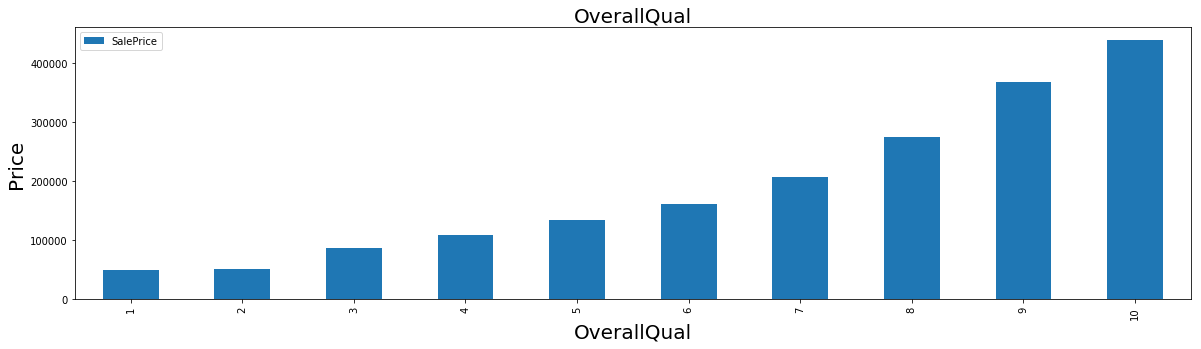

In [207]:
chart_bar('OverallQual')

### 18. OverallCond
Rates the overall condition of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average	
       5	Average
       4	Below Average	
       3	Fair
       2	Poor
       1	Very Poor	

In [208]:
train_test_info('OverallCond')

Information of OverallCond 

Train
Number of null :  0
Number of value unique :  9
Kind of value unique :  [5 8 6 7 4 2 3 9 1]


Test
Number of null :  0
Number of value unique :  9
Kind of value unique :  [6 5 7 8 2 9 3 4 1]




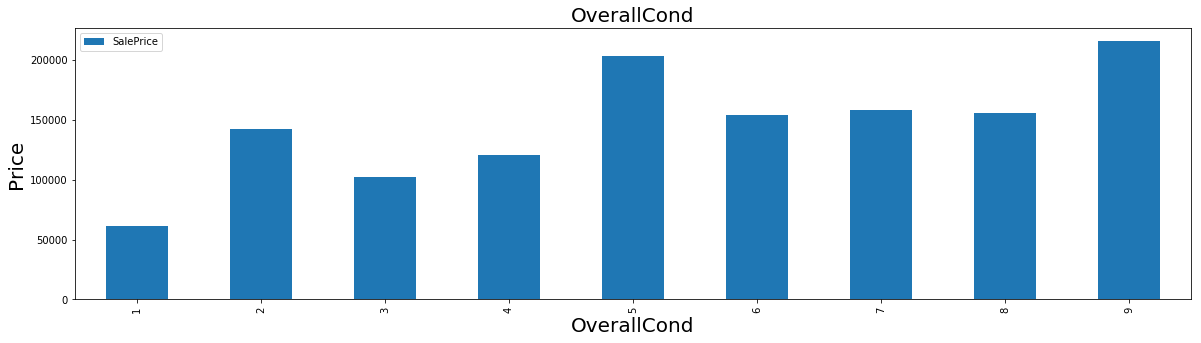

In [209]:
chart_bar('OverallCond')

### 19. YearBuilt
Original construction date

In [210]:
train_test_info('YearBuilt')

Information of YearBuilt 

Train
Number of null :  0
Number of value unique :  112
Kind of value unique :  [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]


Test
Number of null :  0
Number of value unique :  106
Kind of value unique :  [1961 1958 1997 1998 1992 1993 1990 1970 1999 1971 1975 2009 2005 2003
 2002 2006 2004 1920 1974 2000 2010 1967 1978 1966 1964 1962 1952 1949
 1959 1956 1955 1948 1960 1963 1900 1957 1938 1923 1890 1910 1922 1950
 1925 1939 1940 1942 1936 1930

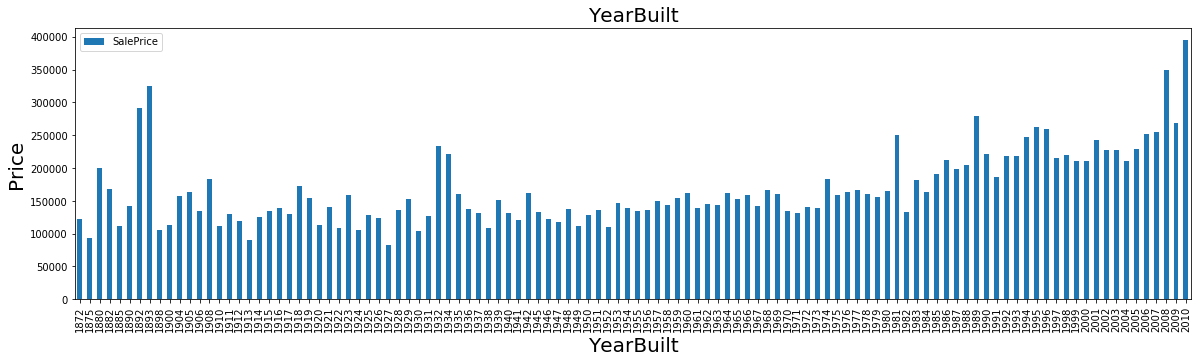

In [211]:
chart_bar('YearBuilt')

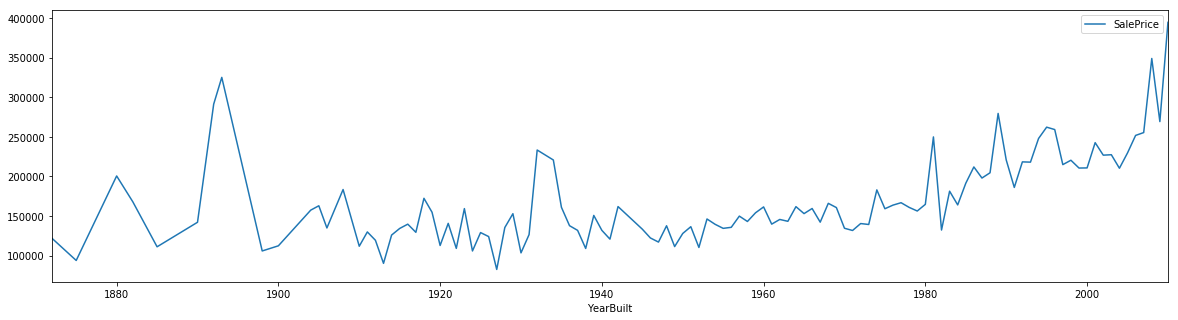

In [212]:
train[['YearBuilt', 'SalePrice']].groupby('YearBuilt').mean().plot(figsize = (20,5))

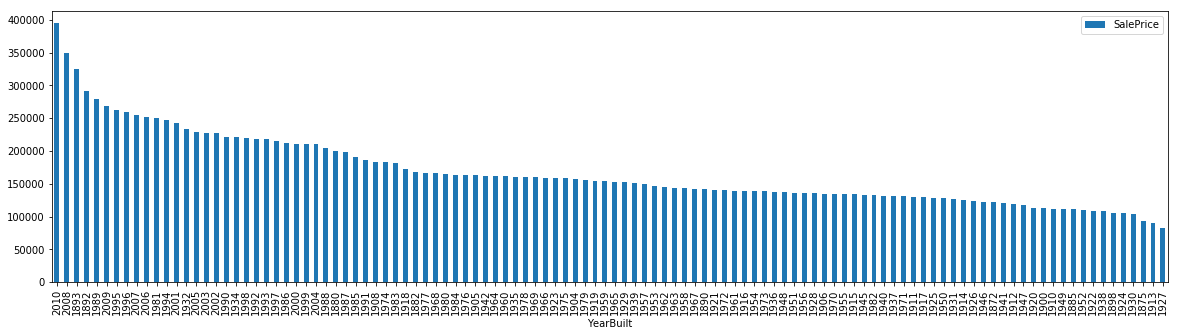

In [213]:
train[['YearBuilt', 'SalePrice']].groupby('YearBuilt').mean().sort_values(by = 'SalePrice', ascending = False).plot(kind = 'bar', figsize = (20, 5))

### 19-1 Mapping
- Divided 10% per each range of price's mean

In [214]:
train[['YearBuilt', 'SalePrice']].groupby('YearBuilt').mean().describe()

,SalePrice
count,112.000000
mean,168213.487811
std,55775.657497
min,82666.666667
25%,131989.383333
50%,153620.133013
75%,201623.903409
max,394432.000000


In [215]:
df = train[['YearBuilt', 'SalePrice']].groupby('YearBuilt').mean()
df.index

Int64Index([1872, 1875, 1880, 1882, 1885, 1890, 1892, 1893, 1898, 1900,
            ...
            2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010],
           dtype='int64', name='YearBuilt', length=112)

In [216]:
p10 = np.arange(int(df.values.min()), round(df.values.max()), int((int(df.values.max()) - int(df.values.min()))/10))
p10 = p10 + np.array([0,0,0,0,0,0,0,0,0,0,100])
p10

array([ 82666., 113842., 145018., 176194., 207370., 238546., 269722.,
       300898., 332074., 363250., 394526.])

In [217]:
df[(df['SalePrice'] > p10[1]) & (df['SalePrice'] < p10[2])].index

Int64Index([1872, 1890, 1906, 1911, 1912, 1914, 1915, 1916, 1917, 1921, 1925,
            1926, 1928, 1931, 1936, 1937, 1940, 1941, 1945, 1946, 1947, 1948,
            1950, 1951, 1954, 1955, 1956, 1958, 1961, 1963, 1967, 1970, 1971,
            1972, 1973, 1982],
           dtype='int64', name='YearBuilt')

In [218]:
year_mapping = {}
for n in range(len(p10) - 1):
    index = df[(df['SalePrice'] > p10[n]) & (df['SalePrice'] <= p10[n+1])].index
    for i in index:
        year_mapping.update({i : n})
len(year_mapping)

112

In [219]:
set(test['YearBuilt'].unique().tolist()) - set(year_mapping.keys())

{1879, 1895, 1896, 1901, 1902, 1907}

In [220]:
test.loc[test['YearBuilt'].isin([1879, 1895, 1896, 1901, 1902, 1907])]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
98,1559,0,3,62.935484,6449,1,3,3,3,4,1,3,1,1,1,4,4,1,1907,1950,Gambrel,CompShg,Wd Sdng,Stucco,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,73.0,Unf,0.0,634.0,707.0,GasW,TA,N,SBrkr,942,942,0,1884,0.0,0.0,1,1,4,1,TA,7,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,N,0,0,239,0,0,0,NaN,NaN,NaN,0,3,2010,WD,Abnorml
142,1603,7,3,66.000000,8712,0,3,1,3,1,1,0,1,1,1,3,4,7,1896,1950,Hip,CompShg,Wd Sdng,Wd Sdng,None,0.0,Fa,Fa,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,756.0,756.0,GasA,Gd,Y,SBrkr,952,0,0,952,0.0,0.0,1,0,3,1,TA,5,Typ,0,NaN,Detchd,1896.0,RFn,1.0,330.0,TA,TA,N,0,0,265,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Alloca
374,1835,15,2,41.000000,5852,1,3,0,0,1,1,13,3,1,3,1,7,5,1902,2000,Gable,CompShg,MetalSd,MetalSd,Stone,188.0,TA,Fa,BrkTil,TA,Fa,No,Rec,169.0,Unf,0.0,851.0,1020.0,GasA,TA,N,FuseF,978,886,0,1864,0.0,0.0,2,1,6,1,TA,9,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,N,0,188,102,0,0,0,NaN,NaN,NaN,0,5,2009,WD,Normal
757,2218,0,3,60.000000,5280,1,3,1,3,1,1,0,3,1,1,4,4,7,1895,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,Stone,NaN,Fa,No,Unf,0.0,Unf,0.0,173.0,173.0,GasA,Ex,N,SBrkr,825,536,0,1361,0.0,0.0,1,0,2,1,TA,6,Typ,0,NaN,Detchd,1895.0,Unf,1.0,185.0,Fa,TA,Y,0,123,0,0,0,0,NaN,NaN,NaN,0,7,2008,WD,Normal
966,2427,0,4,60.000000,10800,1,0,1,3,4,1,13,1,1,1,4,5,9,1895,1999,Gable,CompShg,Wd Sdng,HdBoard,None,0.0,TA,Gd,CBlock,Gd,TA,Av,Unf,0.0,Unf,0.0,736.0,736.0,GasA,Ex,Y,SBrkr,751,783,0,1534,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,N,0,112,0,0,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
991,2452,1,2,75.000000,13500,1,0,1,3,1,1,13,1,1,1,1,7,8,1879,1987,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,Gd,PConc,TA,TA,No,Unf,0.0,Unf,0.0,819.0,819.0,GasA,TA,Y,FuseA,1312,1142,0,2454,0.0,0.0,2,0,3,1,TA,8,Typ,1,Gd,Attchd,1950.0,Unf,2.0,576.0,TA,TA,N,0,148,150,0,0,0,NaN,MnPrv,NaN,0,2,2007,WD,Normal
1007,2468,10,2,40.000000,5680,1,0,1,3,4,1,13,1,1,1,0,5,4,1901,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,592.0,592.0,GasA,TA,N,FuseA,933,240,0,1173,0.0,0.0,2,0,3,1,TA,7,Typ,0,NaN,Detchd,1920.0,Unf,1.0,240.0,TA,Fa,Y,0,25,77,0,0,0,NaN,MnPrv,NaN,0,9,2007,WD,AdjLand
1008,2469,11,2,40.000000,5680,1,0,1,3,4,1,13,1,1,1,0,5,3,1901,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,969.0,969.0,GasA,TA,N,FuseA,969,245,0,1214,0.0,0.0,1,0,2,1,TA,6,Typ,0,NaN,Detchd,1920.0,Unf,1.0,216.0,TA,TA,N,0,0,77,0,0,0,NaN,MnPrv,NaN,0,9,2007,WD,AdjLand
1119,2580,15,3,75.000000,8250,1,3,1,3,4,1,0,3,1,3,4,5,6,1895,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,957.0,957.0,GasA,Fa,N,SBrkr,1034,957,0,1991,0.0,0.0,2,0,4,2,TA,9,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,N,0,0,133,0,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal


In [221]:
year_mapping_values = []
for a in year_mapping.values():
    year_mapping_values.append(a)
for y in [1879, 1895, 1896, 1901, 1902, 1907]:
    year_mapping.update({y : round(np.array(year_mapping_values).mean())})

In [222]:
for data in train_test_data:
    data['YearBuilt'] = data['YearBuilt'].map(year_mapping, na_action = 'ignore')
train_test_info('YearBuilt')

Information of YearBuilt 

Train
Number of null :  0
Number of value unique :  10
Kind of value unique :  [4. 2. 5. 1. 0. 3. 8. 6. 9. 7.]


Test
Number of null :  0
Number of value unique :  9
Kind of value unique :  [1. 4. 2. 5. 0. 3. 9. 6. 8.]




### 20. YearRemodAdd
Remodel date (same as construction date if no remodeling or additions)

In [223]:
train_test_info('YearRemodAdd', sort = True)

Information of YearRemodAdd 

Train
Number of null :  0
Number of value unique :  61
Kind of value unique :  [1950 1951 1952 1953 1954 1955 1956 1957 1958 1959 1960 1961 1962 1963
 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977
 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991
 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005
 2006 2007 2008 2009 2010]


Test
Number of null :  0
Number of value unique :  61
Kind of value unique :  [1950 1951 1952 1953 1954 1955 1956 1957 1958 1959 1960 1961 1962 1963
 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977
 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991
 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005
 2006 2007 2008 2009 2010]




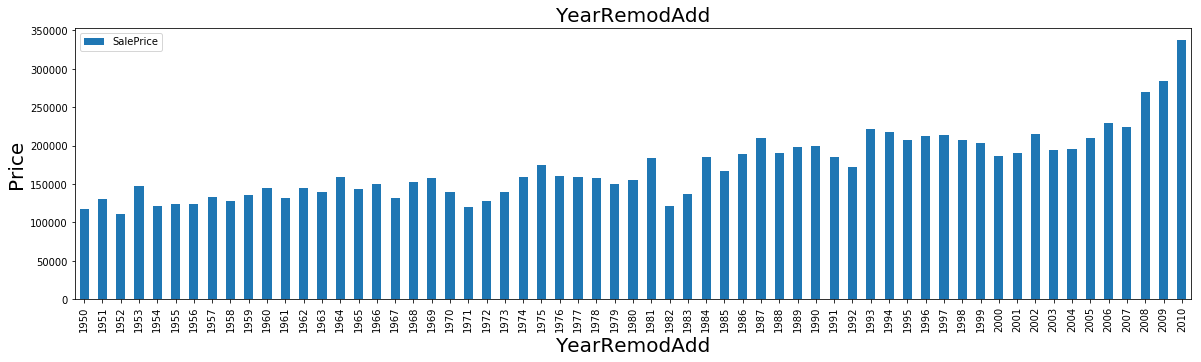

In [224]:
chart_bar('YearRemodAdd')

In [225]:
df = train[['YearRemodAdd', 'SalePrice']].groupby('YearRemodAdd').mean()
df.describe()

,SalePrice
count,61.000000
mean,172664.728552
std,44083.230623
min,110398.600000
25%,139081.818182
50%,159357.142857
75%,200042.000000
max,336963.500000


In [226]:
p1 = df.loc[(df['SalePrice'] >= df['SalePrice'].min()) & (df['SalePrice'] < 139082), 'SalePrice'].index.tolist()
p2 = df.loc[(df['SalePrice'] >= 139082) & (df['SalePrice'] < 159358), 'SalePrice'].index.tolist()
p3 = df.loc[(df['SalePrice'] >= 159358) & (df['SalePrice'] < 200043), 'SalePrice'].index.tolist()
p4 = df.loc[(df['SalePrice'] >= 200043) & (df['SalePrice'] <= df['SalePrice'].max()), 'SalePrice'].index.tolist()
p = [p1, p2, p3, p4]

In [227]:
remodel_year_mapping = {}
for i, years in enumerate(p):
    for year in years:
        remodel_year_mapping.update({year : i})
for data in train_test_data:
    data['YearRemodAdd'] = data['YearRemodAdd'].map(remodel_year_mapping)

In [228]:
len(remodel_year_mapping)

61

In [229]:
train_test_info('YearRemodAdd')

Information of YearRemodAdd 

Train
Number of null :  0
Number of value unique :  4
Kind of value unique :  [2 3 1 0]


Test
Number of null :  0
Number of value unique :  4
Kind of value unique :  [0 3 2 1]




### 21. RoofStyle
Type of roof

       Flat	Flat
       Gable	Gable
       Gambrel	Gabrel (Barn)
       Hip	Hip
       Mansard	Mansard
       Shed	Shed

In [230]:
train_test_info('RoofStyle')

Information of RoofStyle 

Train
Number of null :  0
Number of value unique :  6
Kind of value unique :  ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']


Test
Number of null :  0
Number of value unique :  6
Kind of value unique :  ['Gable' 'Hip' 'Gambrel' 'Flat' 'Mansard' 'Shed']




In [231]:
for data in train_test_data:
    data['RoofStyle'] = data['RoofStyle'].map(mapping('RoofStyle'))
train_test_info('RoofStyle')

Information of RoofStyle 

Train
Number of null :  0
Number of value unique :  6
Kind of value unique :  [5 1 3 2 4 0]


Test
Number of null :  0
Number of value unique :  6
Kind of value unique :  [5 1 3 4 2 0]




### 22. RoofMatl
Roof material

       ClyTile	Clay or Tile
       CompShg	Standard (Composite) Shingle
       Membran	Membrane
       Metal	Metal
       Roll	Roll
       Tar&Grv	Gravel & Tar
       WdShake	Wood Shakes
       WdShngl	Wood Shingles  

In [232]:
train_test_info('RoofMatl')

Information of RoofMatl 

Train
Number of null :  0
Number of value unique :  8
Kind of value unique :  ['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile']


Test
Number of null :  0
Number of value unique :  4
Kind of value unique :  ['CompShg' 'Tar&Grv' 'WdShake' 'WdShngl']




In [233]:
for data in train_test_data:
    data['RoofMatl'] = data['RoofMatl'].map(mapping('RoofMatl'))
train_test_info('RoofMatl')

Information of RoofMatl 

Train
Number of null :  0
Number of value unique :  8
Kind of value unique :  [7 4 1 3 6 5 0 2]


Test
Number of null :  0
Number of value unique :  4
Kind of value unique :  [7 5 3 4]




### 23. Exterior1st
Exterior covering on house

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast	
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles

In [234]:
train_test_info('Exterior1st')

Information of Exterior1st 

Train
Number of null :  0
Number of value unique :  15
Kind of value unique :  ['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkFace' 'WdShing' 'CemntBd'
 'Plywood' 'AsbShng' 'Stucco' 'BrkComm' 'AsphShn' 'Stone' 'ImStucc'
 'CBlock']


Test
Number of null :  1
Number of value unique :  14
Kind of value unique :  ['VinylSd' 'Wd Sdng' 'HdBoard' 'Plywood' 'MetalSd' 'CemntBd' 'WdShing'
 'BrkFace' 'AsbShng' 'BrkComm' 'Stucco' 'AsphShn' nan 'CBlock']




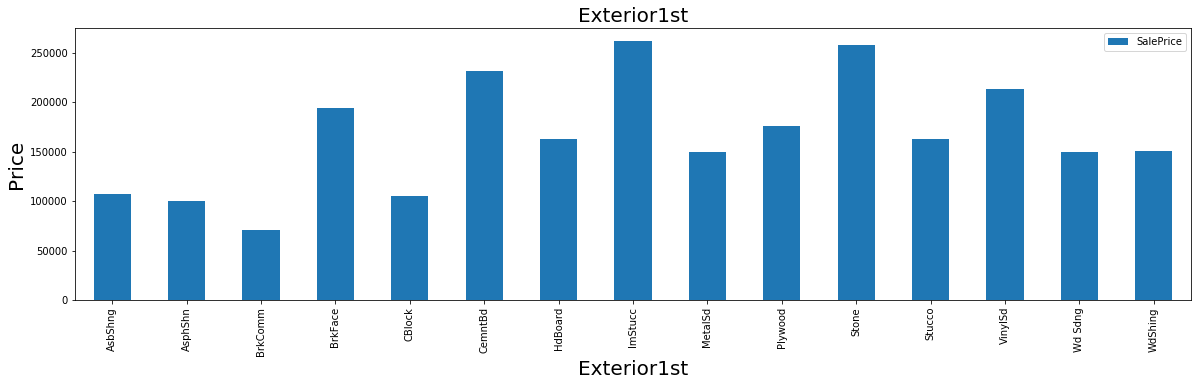

In [235]:
chart_bar('Exterior1st')

### 23-1. Fill NaN

In [236]:
test.loc[test['Exterior1st'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
691,2152,7,4,85.0,19550,1,3,1,3,4,1,17,1,1,1,3,5,7,1.0,3,4,5,NaN,NaN,None,0.0,TA,TA,PConc,TA,TA,Gd,ALQ,1035.0,Unf,0.0,545.0,1580.0,GasA,Ex,Y,SBrkr,1518,0,0,1518,1.0,0.0,1,0,2,1,Fa,5,Typ,2,Gd,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,39,0,0,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal


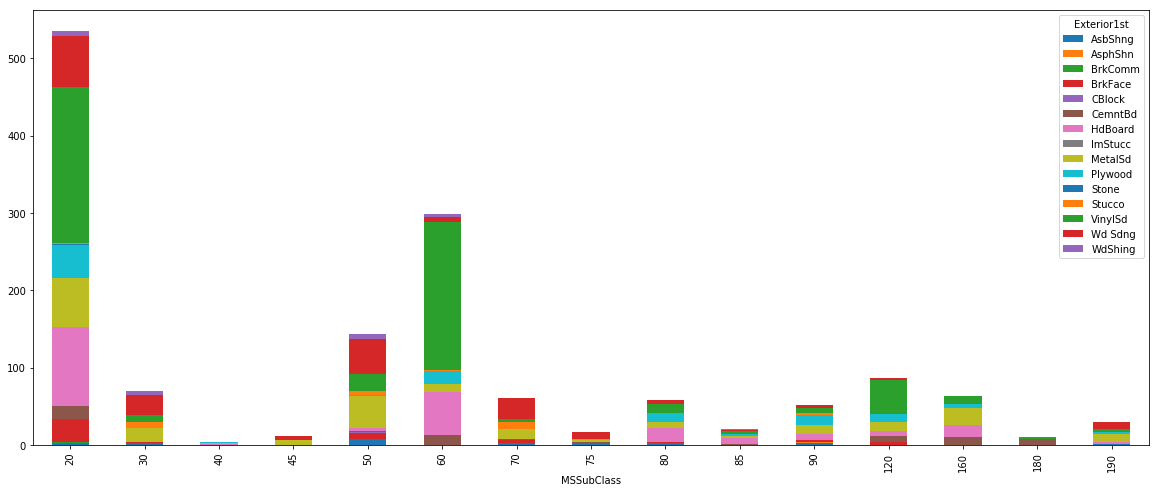

In [237]:
train_raw[['MSSubClass', 'Exterior1st']].groupby(['MSSubClass', 'Exterior1st']).size().unstack().plot(kind = 'bar', stacked = True, figsize = (20,8))

In [238]:
test['Exterior1st'] = test['Exterior1st'].fillna('BrkFace')
for data in train_test_data:
    data['Exterior1st'] = data['Exterior1st'].map(mapping('Exterior1st'))
train_test_info('Exterior1st')

Information of Exterior1st 

Train
Number of null :  0
Number of value unique :  15
Kind of value unique :  [12  5 14  4  3 10  0 11  2  7  6  9 15  8 13]


Test
Number of null :  0
Number of value unique :  13
Kind of value unique :  [12 14  4 11  5  0 10  3  2  6  7  9 13]




### 24. Exterior2nd
Exterior covering on house (if more than one material)

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles

In [239]:
train_test_info('Exterior2nd')

Information of Exterior2nd 

Train
Number of null :  0
Number of value unique :  16
Kind of value unique :  ['VinylSd' 'MetalSd' 'Wd Shng' 'HdBoard' 'Plywood' 'Wd Sdng' 'CmentBd'
 'BrkFace' 'Stucco' 'AsbShng' 'Brk Cmn' 'ImStucc' 'AsphShn' 'Stone'
 'Other' 'CBlock']


Test
Number of null :  1
Number of value unique :  16
Kind of value unique :  ['VinylSd' 'Wd Sdng' 'HdBoard' 'Plywood' 'MetalSd' 'Brk Cmn' 'CmentBd'
 'ImStucc' 'Wd Shng' 'AsbShng' 'Stucco' 'CBlock' 'BrkFace' 'AsphShn' nan
 'Stone']




### 24-1. Fill NaN

In [240]:
test_raw[test_raw['Exterior2nd'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
691,2152,30,RL,85.0,19550,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,7,1940,2007,Flat,Tar&Grv,NaN,NaN,None,0.0,TA,TA,PConc,TA,TA,Gd,ALQ,1035.0,Unf,0.0,545.0,1580.0,GasA,Ex,Y,SBrkr,1518,0,0,1518,1.0,0.0,1,0,2,1,Fa,5,Typ,2,Gd,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,39,0,0,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal


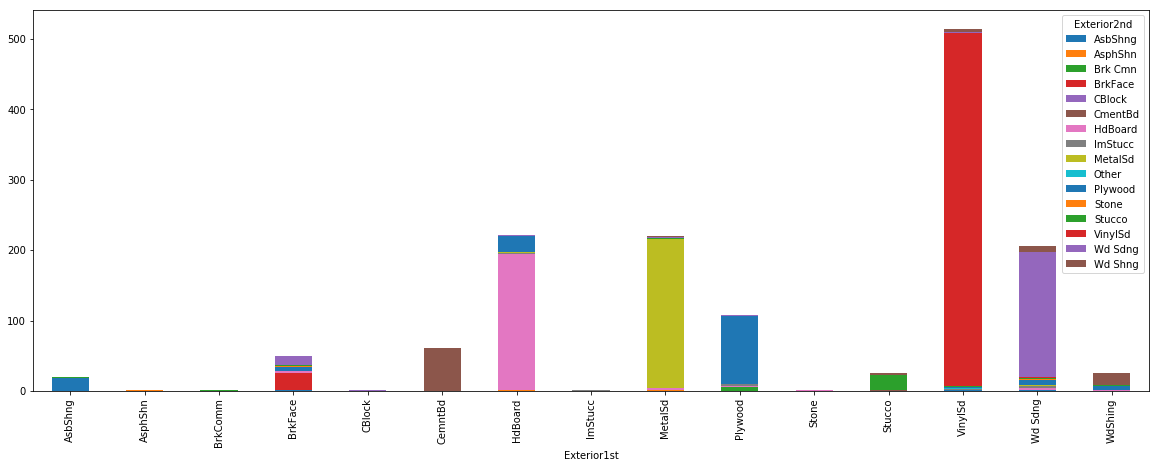

In [241]:
train_raw[['Exterior1st', 'Exterior2nd']].groupby(['Exterior1st', 'Exterior2nd']).size().unstack().plot(kind = 'bar', figsize = (20, 7), stacked = True)

In [242]:
test.loc[test['Exterior2nd'].isnull(), 'Exterior1st'].values

array([3], dtype=int64)

In [243]:
test['Exterior2nd'] = test['Exterior2nd'].fillna('BrkFace')
for data in train_test_data:
    data['Exterior2nd'] = data['Exterior2nd'].map(mapping('Exterior2nd'))
train_test_info('Exterior2nd')

Information of Exterior2nd 

Train
Number of null :  0
Number of value unique :  16
Kind of value unique :  [10  4 13  2  9 15 11  3  5  1  7  6  8 16 14 12]


Test
Number of null :  0
Number of value unique :  15
Kind of value unique :  [10 15  2  9  4  7 11  6 13  1  5 12  3  8 16]




### 25. MasVnrType
Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone

In [244]:
train_test_info('MasVnrType')

Information of MasVnrType 

Train
Number of null :  8
Number of value unique :  5
Kind of value unique :  ['BrkFace' 'None' 'Stone' 'BrkCmn' nan]


Test
Number of null :  16
Number of value unique :  5
Kind of value unique :  ['None' 'BrkFace' 'Stone' 'BrkCmn' nan]




### 26-1. Fill NaN

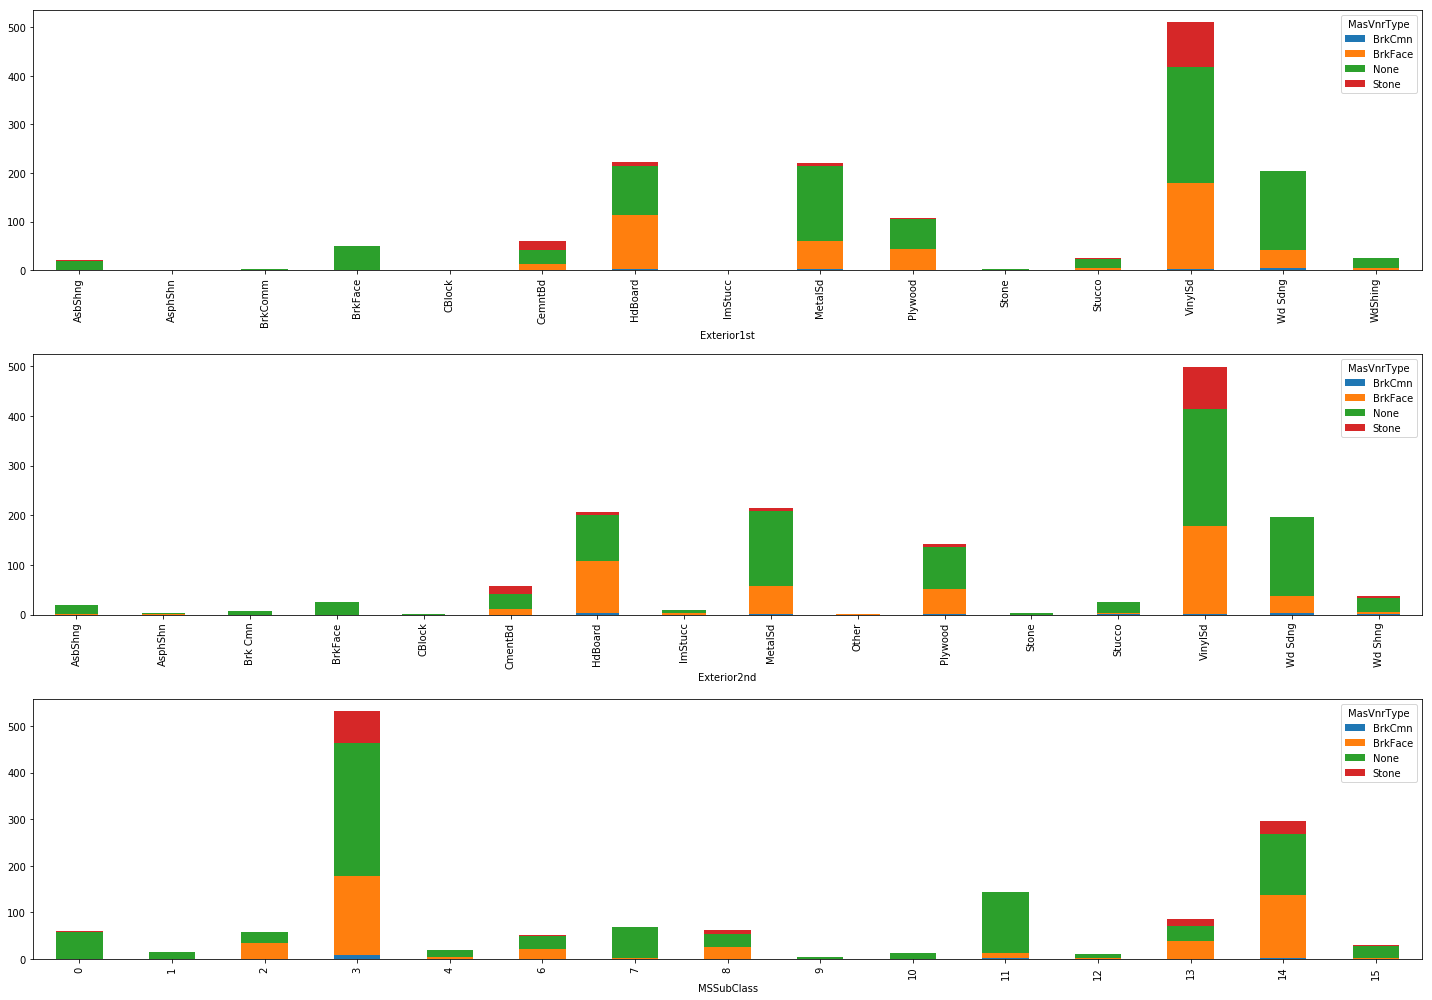

In [245]:
fig, axes = plt.subplots(3)
train_raw[['Exterior1st', 'MasVnrType']].groupby(['Exterior1st', 'MasVnrType']).size().unstack().plot(kind = 'bar', figsize = (20,14), stacked = True, ax = axes[0])
train_raw[['Exterior2nd', 'MasVnrType']].groupby(['Exterior2nd', 'MasVnrType']).size().unstack().plot(kind = 'bar', figsize = (20,14), stacked = True, ax = axes[1])
train[['MSSubClass', 'MasVnrType']].groupby(['MSSubClass', 'MasVnrType']).size().unstack().plot(kind = 'bar', figsize = (20,14), stacked = True, ax = axes[2])
plt.tight_layout()

In [246]:
test.loc[(test['MasVnrType'].isnull()) & (test['MasVnrArea'].notnull()), 'MasVnrType'] = 'BrkFace'

In [247]:
for data in train_test_data:
    data['MasVnrType'] = data['MasVnrType'].fillna('None')
    data['MasVnrType'] = data['MasVnrType'].map(mapping('MasVnrType'))
train_test_info('MasVnrType')

Information of MasVnrType 

Train
Number of null :  0
Number of value unique :  4
Kind of value unique :  [1 2 4 3]


Test
Number of null :  0
Number of value unique :  4
Kind of value unique :  [2 1 4 3]




### 26. MasVnrArea
Masonry veneer area in square feet

In [248]:
train_test_info('MasVnrArea')

Information of MasVnrArea 

Train
Number of null :  8
Number of value unique :  328
Kind of value unique :  [1.960e+02 0.000e+00 1.620e+02 3.500e+02 1.860e+02 2.400e+02 2.860e+02
 3.060e+02 2.120e+02 1.800e+02 3.800e+02 2.810e+02 6.400e+02 2.000e+02
 2.460e+02 1.320e+02 6.500e+02 1.010e+02 4.120e+02 2.720e+02 4.560e+02
 1.031e+03 1.780e+02 5.730e+02 3.440e+02 2.870e+02 1.670e+02 1.115e+03
 4.000e+01 1.040e+02 5.760e+02 4.430e+02 4.680e+02 6.600e+01 2.200e+01
 2.840e+02 7.600e+01 2.030e+02 6.800e+01 1.830e+02 4.800e+01 2.800e+01
 3.360e+02 6.000e+02 7.680e+02 4.800e+02 2.200e+02 1.840e+02 1.129e+03
 1.160e+02 1.350e+02 2.660e+02 8.500e+01 3.090e+02 1.360e+02 2.880e+02
 7.000e+01 3.200e+02 5.000e+01 1.200e+02 4.360e+02 2.520e+02 8.400e+01
 6.640e+02 2.260e+02 3.000e+02 6.530e+02 1.120e+02 4.910e+02 2.680e+02
 7.480e+02 9.800e+01 2.750e+02 1.380e+02 2.050e+02 2.620e+02 1.280e+02
 2.600e+02 1.530e+02 6.400e+01 3.120e+02 1.600e+01 9.220e+02 1.420e+02
 2.900e+02 1.270e+02 5.060e+02 2.970e+02

### 26-1. FIll Nan

In [249]:
for data in train_test_data:
    data['MasVnrArea'] = data['MasVnrArea'].fillna(0)

In [250]:
train_test_info('MasVnrArea', cut = True)

Information of MasVnrArea 

Train
Number of null :  0
Number of value unique :  327
Kind of value unique : ----


Test
Number of null :  0
Number of value unique :  303
Kind of value unique : ----




### 27. ExterQual
Evaluates the quality of the material on the exterior 
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

In [251]:
train_test_info('ExterQual')

Information of ExterQual 

Train
Number of null :  0
Number of value unique :  4
Kind of value unique :  ['Gd' 'TA' 'Ex' 'Fa']


Test
Number of null :  0
Number of value unique :  4
Kind of value unique :  ['TA' 'Gd' 'Ex' 'Fa']




In [252]:
for data in train_test_data:
    data['ExterQual'] = data['ExterQual'].map(mapping('ExterQual'))
train_test_info('ExterQual')

Information of ExterQual 

Train
Number of null :  0
Number of value unique :  4
Kind of value unique :  [2 3 1 0]


Test
Number of null :  0
Number of value unique :  4
Kind of value unique :  [3 2 1 0]




### It is hard to handle all features in one jupyter notebook, so i seperated in Three parts

In [254]:
train.to_csv('train1.csv')
test.to_csv('test1.csv')

## References
- Feature description for Korean : https://blog.naver.com/kyungmin3737/221042939756